# K Nearest Neighbors mit Python

Uns wurden ein klassifizierter Datensatz von einer Firma für unseren Auftrag gegeben. Da die Daten sensibel sind wurden die Spaltennamen entfernt. Weiterhin beinhaltet sind die Zielklassen der Einträge.

Wir werden nun KNN verwenden, um ein Modell zu erstellen, dass die Klasse eines neuen Eintrags vorhersagt. Dazu nutzen wir die anonymisierten Informationen.

Legen wir los!

## Libraries importieren

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Die Daten

Setzen wir die erste Spalte (index_col) = 0, um sie als Index zu verwenden.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Variablen standardisieren

Der KNN-Klassifizierer sagt die Klasse eines gegeben Testobjekts durch seine Nähe zu anderen Beobachtungen heraus. Deshalb ist die Skala der Variablen wichtig. Variablen auf einer großen Skala (z.B. Distanz zwischen Städten in Metern) würden deshalb einen größeren Einfluss auf die Klassifizerung haben als solche mit Kleiner Skala (z.B. Tag des Monats).

Um dies zu berücksichtigen standardisieren wir nun zuerst unsere Daten:

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## KNN nutzen

Denkt daran, dass wir versuchen ein Modell zu erstellen, das vorhersagt, ob jemand zur Zielgruppe (en. target class) gehört oder nicht. Wir beginnen mit k=1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
pred = knn.predict(X_test)

## Vorhersagen und Auswertung

Lasst uns unser erstes Modell bewerten!

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,pred))

[[128  13]
 [ 11 148]]


In [17]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.91      0.91       141
          1       0.92      0.93      0.93       159

avg / total       0.92      0.92      0.92       300



## Einen K Wert auswählen

Als nächstes können wir das Elbow-Kriterium verwenden, um einen guten K Wert auszuwählen:

In [18]:
error_rate = []

# Könnte etwas Zeit dauern
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

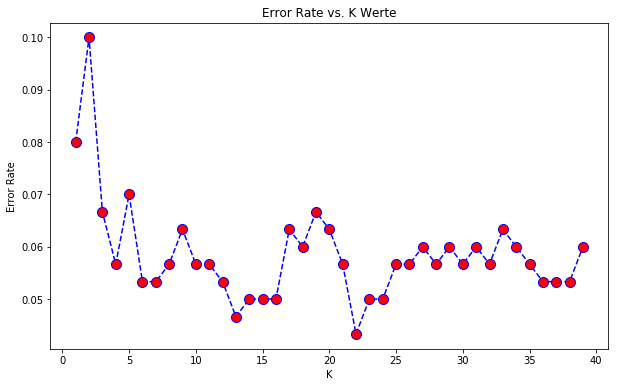

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Werte')
plt.xlabel('K')
plt.ylabel('Error Rate')

Wir sehen hier, dass nach K>23 die Error Rate um 0.06-0.05 schwankt. Lasst uns das Modell erneut trainieren und diese Erkenntnis berücksichtigen. Dann schauen wir uns den Classification Report an!

In [20]:
# Ein Vergleich zu unserem ersten Modell
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Mit K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Mit K=1


[[128  13]
 [ 11 148]]


             precision    recall  f1-score   support

          0       0.92      0.91      0.91       141
          1       0.92      0.93      0.93       159

avg / total       0.92      0.92      0.92       300



In [21]:
# Jetzt mit K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Mit K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Mit K=23


[[131  10]
 [  5 154]]


             precision    recall  f1-score   support

          0       0.96      0.93      0.95       141
          1       0.94      0.97      0.95       159

avg / total       0.95      0.95      0.95       300



Wir waren dazu in der Lage etwas mehr Genauigkeit aus unserem Modell herauszuholen indem wir einen guten K Wert gewählt haben.

# Gut gemacht!